# 3T3 Cell Line

# Imports data structuring

In [1]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg

# CNN template import

In [2]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

2022-08-05 18:50:55.877051: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 18:50:55.877233: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Documents from different files will be stored in this directory

In [3]:
diretorio = './../../results/results_3T3' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> 10_images_de_X_test_3T3_melhor_modelo_200_epochs_2022-6-30.gz
1 -> 11_images_de_y_test_3T3_melhor_model_200_epochs_2022-6-30.gz
2 -> 12_lista_img_camp_clar_100_resized_regressao_3T3_samehuh72021-10-25.gz
3 -> 13_lista_rotulo_camp_clar_100_resized_regressao_3T3_samehuh72021-10-25.gz
4 -> 14_model__3T3_regressao_Maior_erro_Mean_squared_error_500_epochs_2022-6-30.h5
5 -> 15_images_de_X_test_3T3_PIOR_modelo_500_epochs2022-6-30.gz
6 -> 16_images_de_y_test_3T3_PIOR_modelo_500_epochs2022-6-30.gz
7 -> 1_lista_img_camp_clar_100_resized_regressao_3T32021-11-9.gz
8 -> 2_lista_img_camp_clar_75_resized_regressao_3T3_2021-11-9.gz
9 -> 3_lista_img_camp_clar_50_resized_regressao_3T3_2021-11-9.gz
10 -> 4_lista_img_camp_clar_25_resized_regressao_3T3_2021-11-9.gz
11 -> 5_lista_rotulo_camp_clar_100_resized_regressao_3T32021-11-9.gz
12 -> 6_lista_rotulo_camp_clar_75_resized_regressao_3T3_2021-11-9.gz
13 -> 7_lista_rotulo_camp_clar_50_resized_regressao_3T3_2021

Lists of all images in each file

In [4]:
#lstando arquivos com as imagens 100%, 75%, 50%, 25%
for k, v in enumerate(lista_dados):
    if k in [7,8,9,10]: #atualizar
        print(f'{k} -> {v}')

7 -> 1_lista_img_camp_clar_100_resized_regressao_3T32021-11-9.gz
8 -> 2_lista_img_camp_clar_75_resized_regressao_3T3_2021-11-9.gz
9 -> 3_lista_img_camp_clar_50_resized_regressao_3T3_2021-11-9.gz
10 -> 4_lista_img_camp_clar_25_resized_regressao_3T3_2021-11-9.gz


## x = features/images

In [5]:
#somando todas as imagens de diferentes tamanho
X_cem = joblib.load(diretorio+ '/' + lista_dados[7])

X_setcin = joblib.load(diretorio+ '/' + lista_dados[8])

X_cinq = joblib.load(diretorio+ '/' + lista_dados[9])

X_vincin = joblib.load(diretorio+ '/' + lista_dados[10])

x = np.asarray(list(X_cem) + list(X_setcin) + list(X_cinq) + list(X_vincin))

x.shape

(832, 200, 200, 3)

## y = labels

Opening the labels that were saved in the preparation of the images

In [6]:
for k, v in enumerate(lista_dados):
    if k in [11,12,13,14]: #atualizar
        print(f'{k} -> {v}')

11 -> 5_lista_rotulo_camp_clar_100_resized_regressao_3T32021-11-9.gz
12 -> 6_lista_rotulo_camp_clar_75_resized_regressao_3T3_2021-11-9.gz
13 -> 7_lista_rotulo_camp_clar_50_resized_regressao_3T3_2021-11-9.gz
14 -> 8_lista_rotulo_camp_clar_25_resized_regressao_3T3_2021-11-9.gz


In [7]:
#somando todos os rótulos de diferentes tamanho
y_cem = joblib.load(diretorio+ '/' + lista_dados[11])

y_setcin = joblib.load(diretorio+ '/' + lista_dados[12])

y_cinq = joblib.load(diretorio+ '/' + lista_dados[13])

y_vincin = joblib.load(diretorio+ '/' + lista_dados[14])

y = np.asarray(list(y_cem) + list(y_setcin) + list(y_cinq) + list(y_vincin))

y.shape

(832,)

In [ ]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

Test and training separation from a library.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(582, 200, 200, 3) 
(250, 200, 200, 3) 
(582,) 
(250,)


In [ ]:
#data = timeProcess()[1]

In [ ]:
#joblib.dump(X_train, '/content/drive/MyDrive/1_Informações_scripts//5_images_de_X_train_3T3_melhor_modelo_200_epochs_'+data+'.gz')
#joblib.dump(y_train, '/content/drive/MyDrive/1_Informações_scripts//5_images_de_y_train_3T3_melhor_modelo_200_epochs_'+data+'.gz')
#joblib.dump(X_test, '/content/drive/MyDrive/1_Informações_scripts//6_images_de_X_test_3T3_melhor_modelo_200_epochs_'+data+'.gz')
#joblib.dump(y_test, '/content/drive/MyDrive/1_Informações_scripts//6_images_de_y_test_3T3_melhor_model_200_epochs_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//6_images_de_y_test_3T3_melhor_model_200_epochs_2022-6-30.gz']

### Model determination

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

# Training and testing epochs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

In [ ]:
# fit model
history = modelo.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=200, verbose=2, 
                    callbacks=[es]
                     )

Epoch 1/200
19/19 - 14s - loss: 36205.2305 - mean_squared_error: 36205.2305 - val_loss: 36233.3555 - val_mean_squared_error: 36233.3555 - 14s/epoch - 743ms/step
Epoch 2/200
19/19 - 1s - loss: 33521.3359 - mean_squared_error: 33521.3359 - val_loss: 34242.7227 - val_mean_squared_error: 34242.7227 - 907ms/epoch - 48ms/step
Epoch 3/200
19/19 - 1s - loss: 31622.4746 - mean_squared_error: 31622.4746 - val_loss: 38855.7109 - val_mean_squared_error: 38855.7109 - 913ms/epoch - 48ms/step
Epoch 4/200
19/19 - 1s - loss: 31855.4492 - mean_squared_error: 31855.4492 - val_loss: 35333.1406 - val_mean_squared_error: 35333.1406 - 907ms/epoch - 48ms/step
Epoch 5/200
19/19 - 1s - loss: 30717.5254 - mean_squared_error: 30717.5254 - val_loss: 34342.5664 - val_mean_squared_error: 34342.5664 - 913ms/epoch - 48ms/step
Epoch 6/200
19/19 - 1s - loss: 31566.6426 - mean_squared_error: 31566.6426 - val_loss: 34259.1992 - val_mean_squared_error: 34259.1992 - 899ms/epoch - 47ms/step
Epoch 7/200
19/19 - 1s - loss: 323

In [ ]:
#modelo.save('/content/drive/MyDrive/1_Informações_scripts//model__3T3_regressao_menor_erro_Mean_squared_error_200_epochs_'+data+'.h5')

## Accuracy Assessment

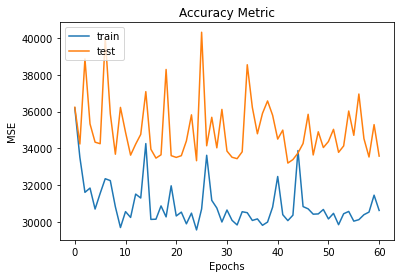

In [ ]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Accuracy Metric')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

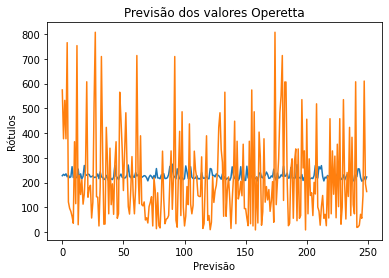

In [ ]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.title('Previsão dos valores Operetta')
plt.ylabel('Rótulos')
plt.xlabel('Previsão')
plt.plot(prev)#azul - o que o modelo previu
plt.plot(y_test)#laranja - o que se sabe - observado
plt.show()

In [ ]:
# Qualit model analisys
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [ ]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}%") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)}") 
print(f"{round(mean_squared_error(y_test, prev), 2)}") #erro médio quadrático
# print(f"{round(median_absolute_error(y_test, prev), 2)}")#Erro médio absoluto sem %



-1.41%
149.12
33587.89


In [ ]:
mean_absolute_error(y_test, prev)

136.23026354980468

In [ ]:
print(f"{round(mean_absolute_error(y_test, prev) * 100, 2)}%")


13623.03%


In [ ]:
print(f"{round(mean_squared_error(y_test, prev) * 100, 2)}%")


3550664.82%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8daaa9d-6377-4e73-9571-1ae0cf7200fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>